In [1]:
!git clone https://github.com/sithu31296/semantic-segmentation
%cd semantic-segmentation
%pip install -e .

fatal: destination path 'semantic-segmentation' already exists and is not an empty directory.
/content/semantic-segmentation
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/semantic-segmentation
  Preparing metadata (setup.py) ... done
  Attempting uninstall: semseg
    Found existing installation: semseg 0.4.1
    Uninstalling semseg-0.4.1:
      Successfully uninstalled semseg-0.4.1
  Running setup.py develop for semseg


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import torch
from torchvision import io
from torchvision import transforms as T
from PIL import Image
import pickle
import matplotlib.pyplot as plt

In [4]:
from semseg import show_models

show_models()

  No.  Model Names
-----  -------------
    1  SegFormer
    2  Lawin
    3  SFNet
    4  BiSeNetv1
    5  DDRNet
    6  FCHarDNet
    7  BiSeNetv2


In [5]:
%pip install -U gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import gdown
from pathlib import Path

ckpt = Path('./checkpoints/pretrained/segformer')
ckpt.mkdir(exist_ok=True, parents=True)

url = 'https://drive.google.com/uc?id=1-OmW3xRD3WAbJTzktPC-VMOF5WMsN8XT'
output = './checkpoints/pretrained/segformer/segformer.b3.ade.pth'

gdown.download(url, output, quiet=False)

Downloading...
From (uriginal): https://drive.google.com/uc?id=1-OmW3xRD3WAbJTzktPC-VMOF5WMsN8XT
From (redirected): https://drive.google.com/uc?id=1-OmW3xRD3WAbJTzktPC-VMOF5WMsN8XT&confirm=t&uuid=c24b130c-7daf-46e8-81f1-3cf1a9b05e53
To: /content/semantic-segmentation/checkpoints/pretrained/segformer/segformer.b3.ade.pth
100%|██████████| 190M/190M [00:00<00:00, 191MB/s]


'./checkpoints/pretrained/segformer/segformer.b3.ade.pth'

In [7]:
from semseg.models import *

model = eval('SegFormer')(
    backbone='MiT-B3',
    num_classes=150
)

try:
    model.load_state_dict(torch.load('checkpointcheckpoints/pretrained/segformer/segformer.b3.ade.pth', map_location='cpu'))
except:
    print("Download a pretrained model's weights from the result table.")
model.eval()

print('Loaded Model')

Download a pretrained model's weights from the result table.
Loaded Model


In [8]:
model.eval()

SegFormer(
  (backbone): MiT(
    (patch_embed1): PatchEmbed(
      (proj): Conv2d(3, 64, kernel_size=(7, 7), stride=(4, 4), padding=(3, 3))
      (norm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    )
    (patch_embed2): PatchEmbed(
      (proj): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
    )
    (patch_embed3): PatchEmbed(
      (proj): Conv2d(128, 320, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (norm): LayerNorm((320,), eps=1e-05, elementwise_affine=True)
    )
    (patch_embed4): PatchEmbed(
      (proj): Conv2d(320, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
    )
    (block1): ModuleList(
      (0): Block(
        (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (attn): Attention(
          (q): Linear(in_features=64, out_features=64, bias=True)
          (kv): 

fatal: destination path 'visiope' already exists and is not an empty directory.
torch.Size([224, 224, 3])


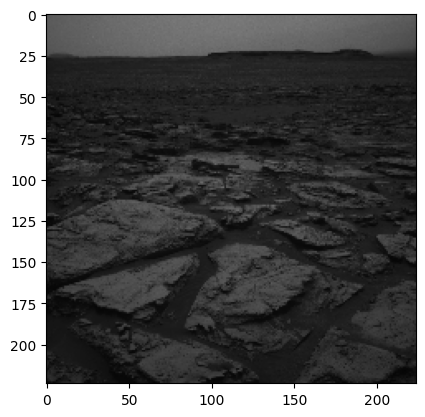

In [9]:

# Load the data loader from the pickle file

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class Ai4MarsData(Dataset):
    #X tensor (torch) -> images
    #y tensor (torch) -> labels

    def __init__(self, X, y, transform=None):
        self.X = X
        self.y = y
        self.transform = transform
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, index):
        image = self.X[index]
        label = self.y[index]

        if self.transform:
            image = self.transform(image)

        return image, label
    
!git clone https://github.com/airoprojects/visiope
with open('/content/drive/MyDrive/Dataset/data_loader.pkl', 'rb') as f:
    data_loader = pickle.load(f)


items = data_loader['dataloader'].dataset.__getitem__(1)

print(items[0].shape)


plt.imshow(items[0])
plt.show()

In [10]:
%ls

assests/      docs/       README.md               semseg/           tools/
checkpoints/  LICENSE     scripts/                semseg.egg-info/  visiope/
configs/      notebooks/  semantic-segmentation/  setup.py


In [11]:
loader = data_loader['dataloader'].dataset

In [12]:
from semseg.datasets import *

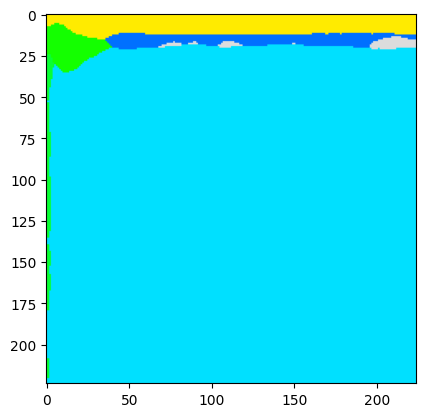

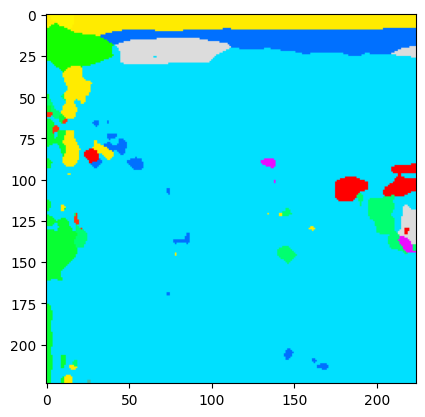

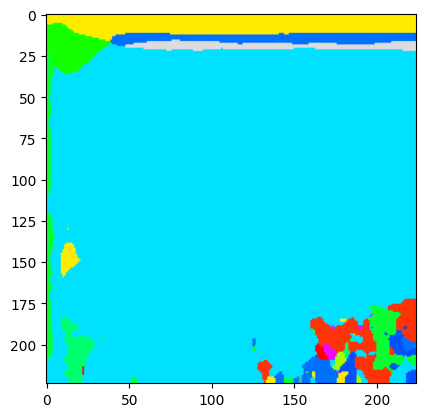

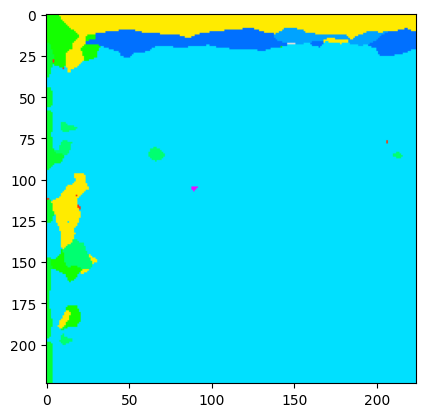

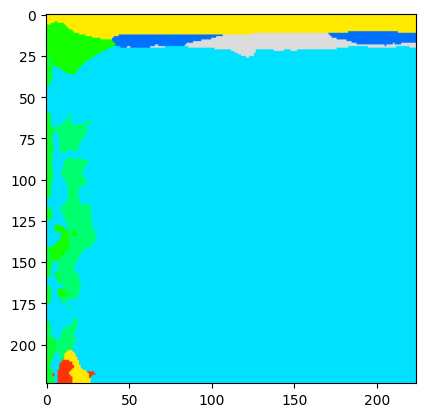

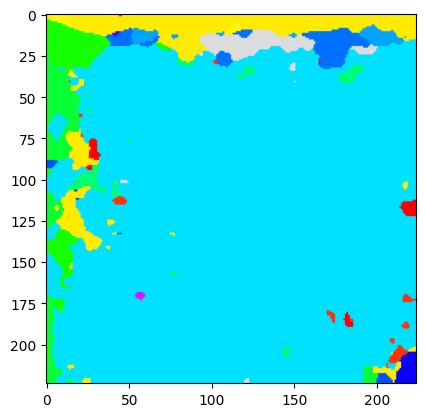

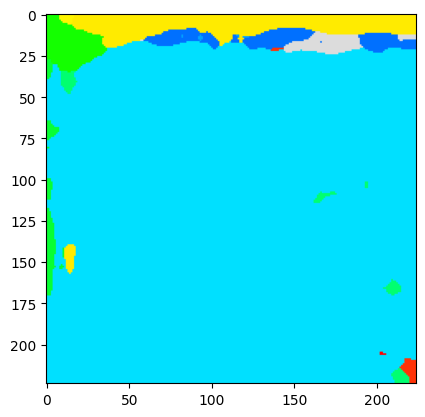

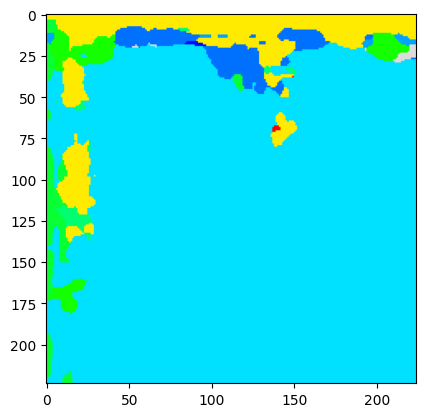

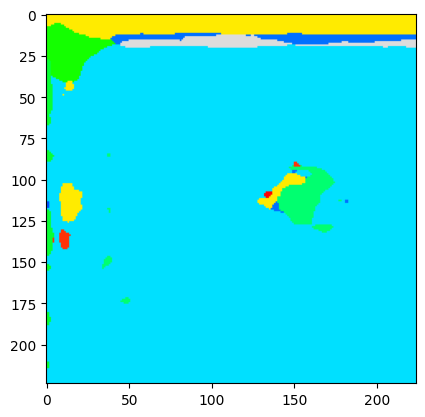

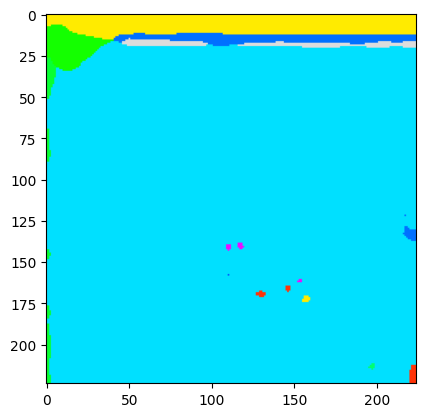

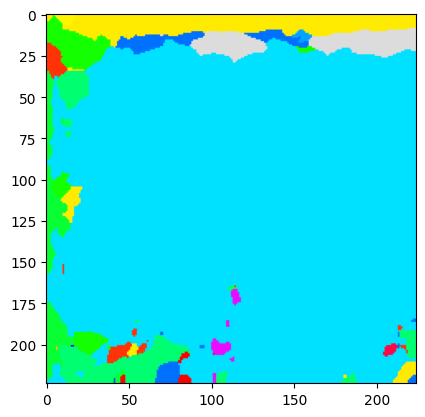

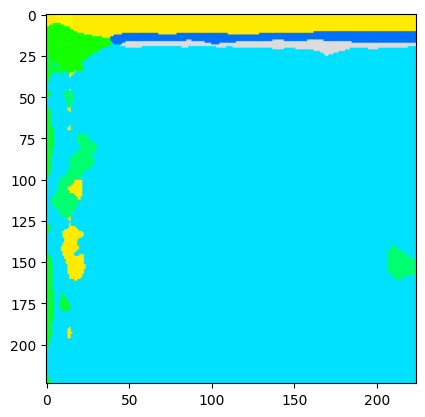

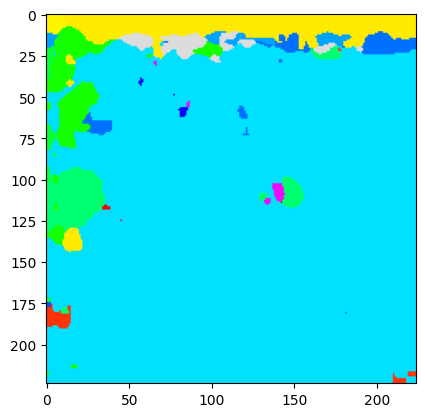

KeyboardInterrupt: ignored

In [29]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#model = model.to(device)
predictions = []
# Use torch.no_grad() to disable gradient computation during testing
with torch.no_grad():

    for images, labels in loader:
        # Move the data to the desired device
        #print(images.shape)
        images = images.permute(2,0,1).to(device)
        images = images [None, :, :, :]
        #print(images.shape)
        #labels = labels.to(device)

        # Forward pass to get the predictions
        with torch.inference_mode():
          prediction = model(images)
        #print(prediction.shape)
        prediction = prediction.softmax(1).argmax(1).to(int)
        #prediction = prediction.round().to(int)
        #print(prediction.shape)
        un = prediction.unique()
        #print(un)
        palette = eval('ADE20K').PALETTE
        prediction_map = palette[prediction].squeeze().to(torch.uint8)
        show_image(prediction_map)
        predictions.append(prediction_map)

In [ ]:
from semseg.datasets import *



In [27]:
def show_image(img):
  plt.imshow(img)
  plt.show()
